In [1]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [2]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt



In [3]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
words = basic_clean(''.join(str(df['Review'].tolist())))


In [5]:
words

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'review',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillow',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bang',
 'door',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night',
 'ok',
 'nothing',
 'special',
 'charge',
 'diamond',
 'member',
 'hilton',
 'decided',
 'chain',
 'shot',
 '20th',
 'anniversary'

In [6]:
len(words)

2063037

In [7]:
uniwords=pd.Series(nltk.ngrams(words, 1)).value_counts()


In [8]:
biwords=(pd.Series(nltk.ngrams(words, 2)).value_counts())
biwords

(great, location)        2143
(staff, friendly)        2087
(ca, nt)                 1809
(room, clean)            1705
(punta, cana)            1682
                         ... 
(access, used7)             1
(cheese, ceral)             1
(sign, pet)                 1
(secured, parkingthe)       1
(min, aware)                1
Length: 955592, dtype: int64

In [9]:
triwords=(pd.Series(nltk.ngrams(words, 3)).value_counts())
triwords

(staff, friendly, helpful)      701
(hotel, great, location)        579
(old, san, juan)                354
(highly, recommend, hotel)      313
(5, minute, walk)               306
                               ... 
(doughnut, corner, saturday)      1
(parking, damper, recent)         1
(free, charge, menu)              1
(actually, got, airport)          1
(cream, afternoon, great)         1
Length: 1822833, dtype: int64

In [10]:
tetrawords=(pd.Series(nltk.ngrams(words, 4)).value_counts())
tetrawords

(great, hotel, great, location)      106
(staff, friendly, helpful, room)      87
(hotel, staff, friendly, helpful)     69
(ca, nt, wait, return)                60
(hotel, great, location, stayed)      58
                                    ... 
(inroom, 19inch, tube, tv)             1
(size400, sq, ft, small)               1
(lobby, desk, affable, night)          1
(walk, uffizzi, ideal, nipping)        1
(stayed, beach, day, overall)          1
Length: 2027730, dtype: int64

In [11]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:12]
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

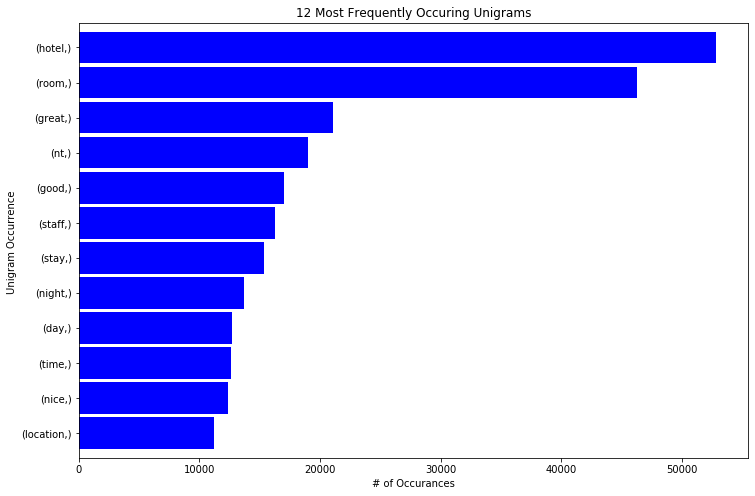

In [12]:
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('12 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram Occurrence ')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

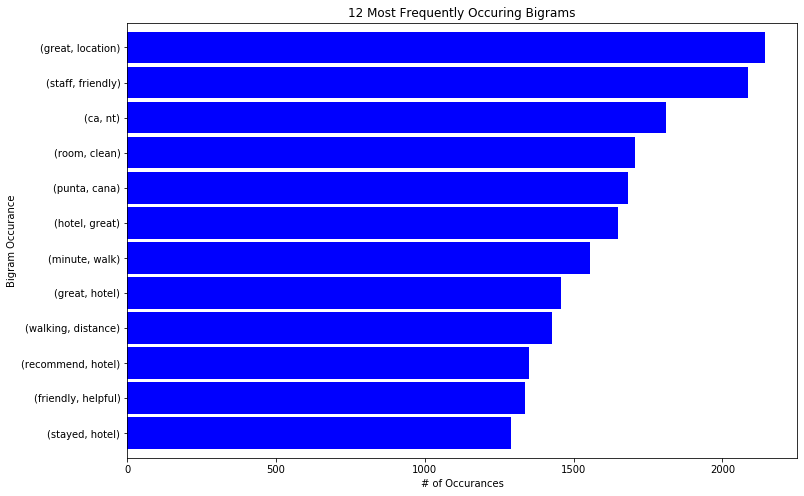

In [13]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('12 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram Occurance')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

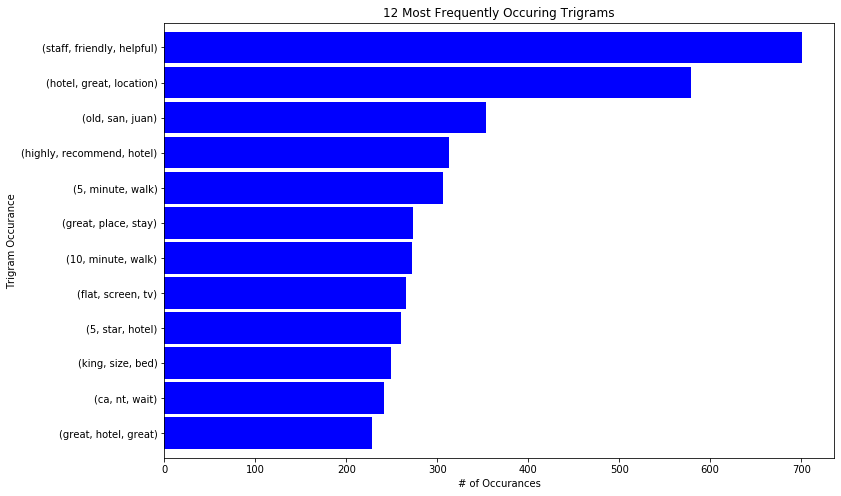

In [14]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('12 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram Occurance')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 1


In [15]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words helpful fluent languages goes way make


In [16]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword



4713


Text(0.5, 0, '# of Occurances')

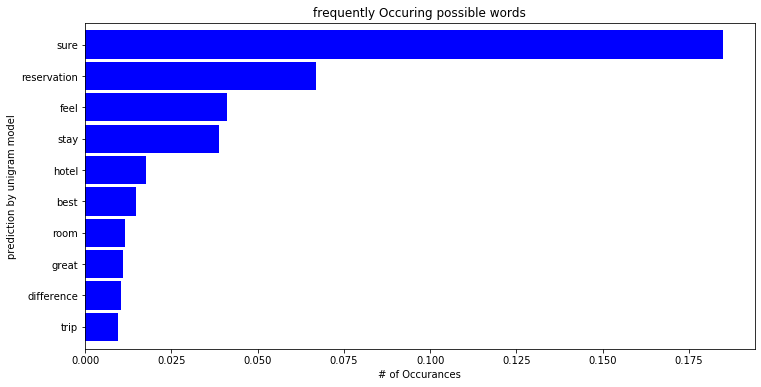

In [17]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [18]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



123


Text(0.5, 0, '# of Occurances')

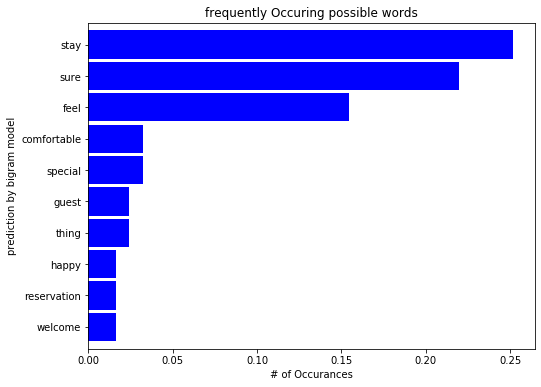

In [19]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')


In [20]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword



2


Text(0.5, 0, '# of Occurances')

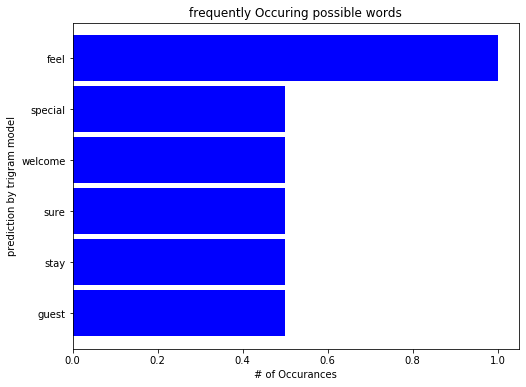

In [21]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 2

In [22]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words reservation 4 persons confirmation


In [23]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


168


Text(0.5, 0, '# of Occurances')

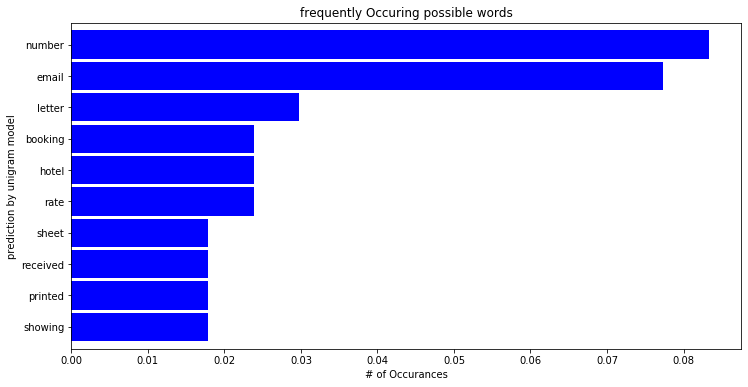

In [24]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [25]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



1


Text(0.5, 0, '# of Occurances')

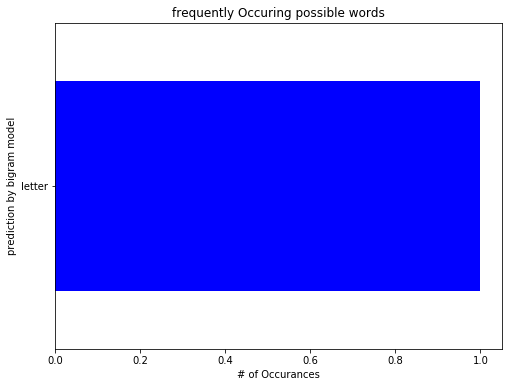

In [26]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [27]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

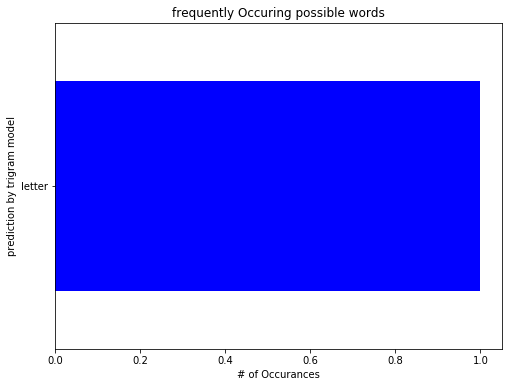

In [28]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 3

In [36]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words hotel lovely modern tasteful excellently equipt


In [37]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


4


Text(0.5, 0, '# of Occurances')

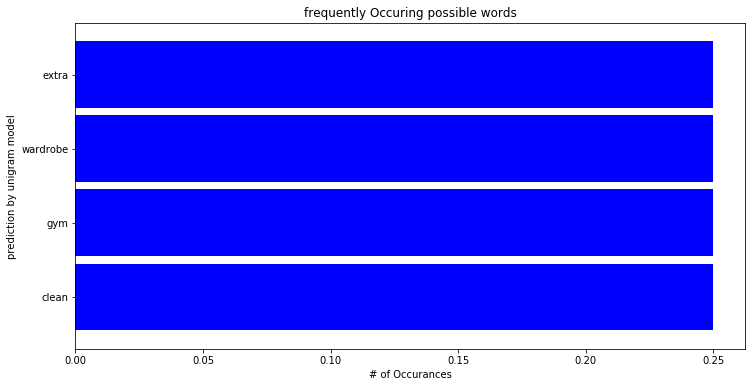

In [38]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [39]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



1


Text(0.5, 0, '# of Occurances')

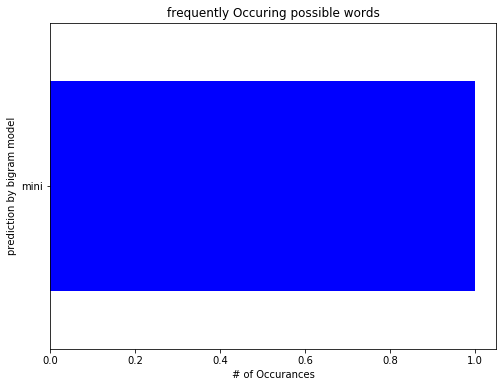

In [33]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [40]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

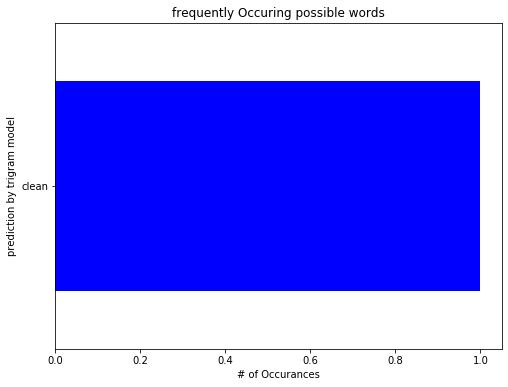

In [41]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 4


In [42]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words rooms large stayed ocean view room completely


In [43]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


545


Text(0.5, 0, '# of Occurances')

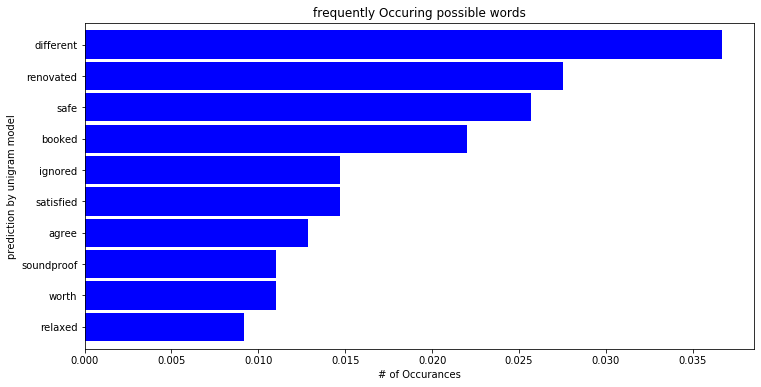

In [44]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [45]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



29


Text(0.5, 0, '# of Occurances')

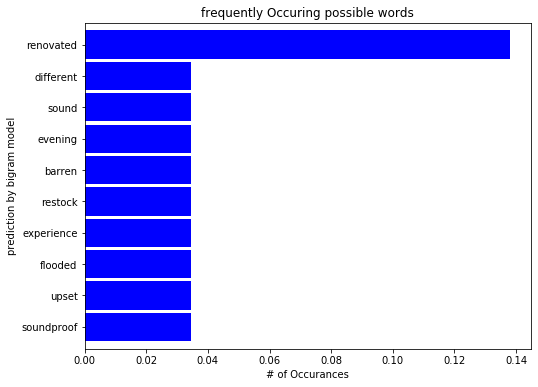

In [46]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [47]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

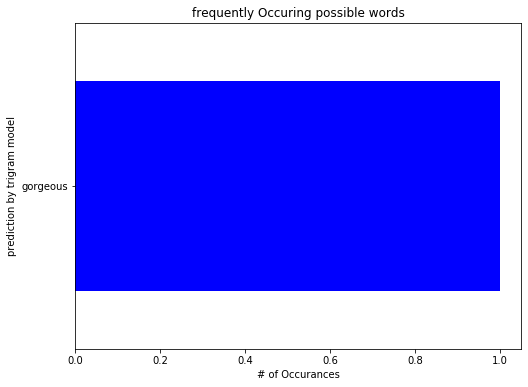

In [48]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 5

In [49]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words windows wide open obviously rid


In [50]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


46


Text(0.5, 0, '# of Occurances')

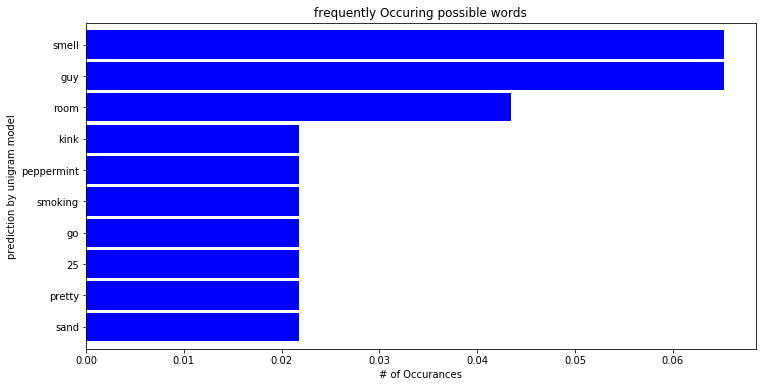

In [51]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [52]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



1


Text(0.5, 0, '# of Occurances')

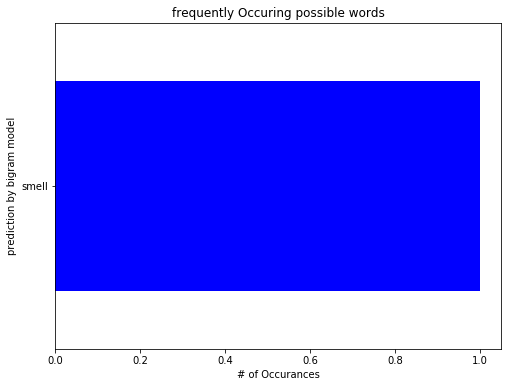

In [53]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [54]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

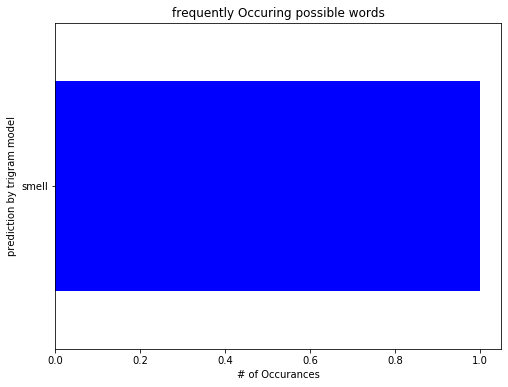

In [55]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 6

In [56]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words great location price view hotel great quick place


In [57]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


9377


Text(0.5, 0, '# of Occurances')

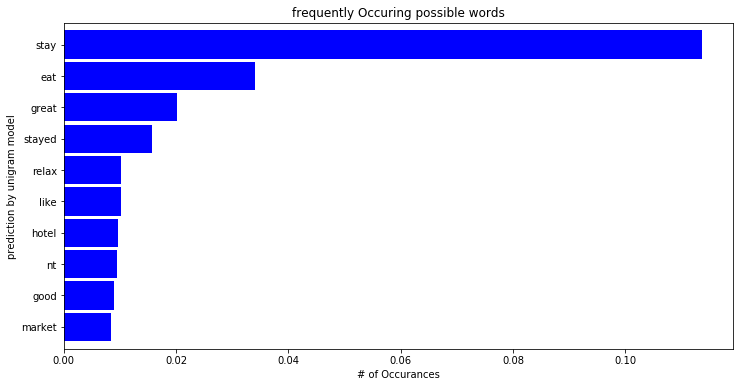

In [58]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [59]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



3


Text(0.5, 0, '# of Occurances')

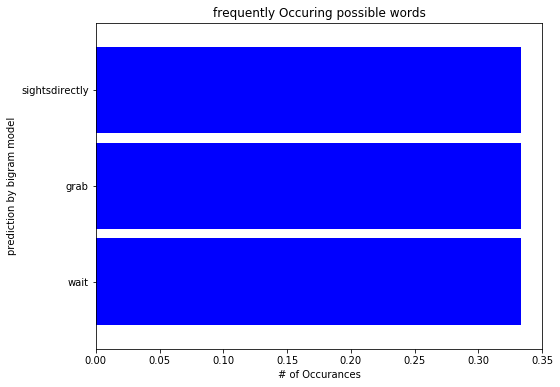

In [60]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [61]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

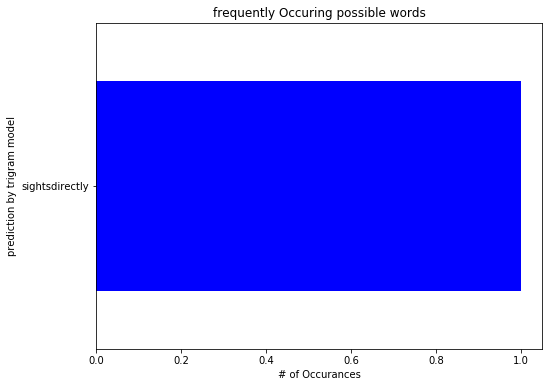

In [62]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 7

In [63]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words the hotel forgot wake resulted missed


In [64]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


300


Text(0.5, 0, '# of Occurances')

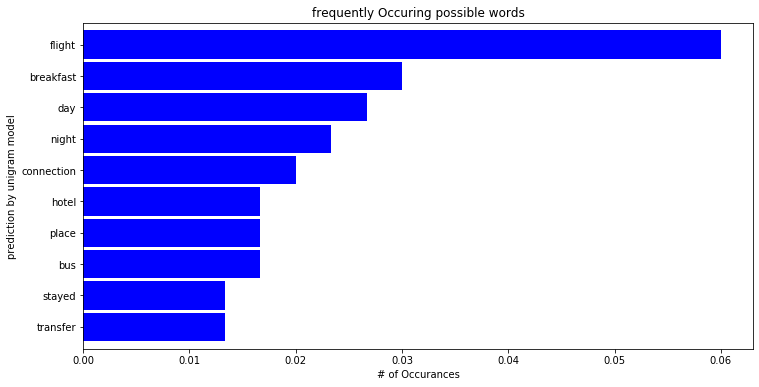

In [65]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [66]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



1


Text(0.5, 0, '# of Occurances')

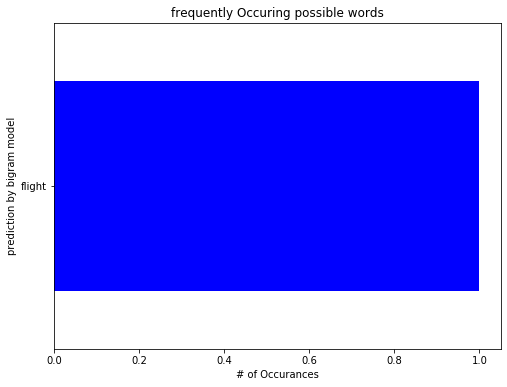

In [67]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [68]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

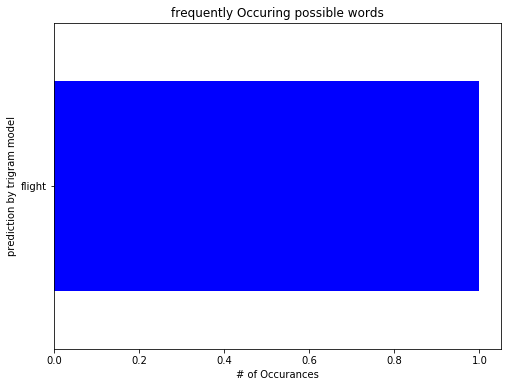

In [69]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 8

In [70]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words room includes flat screen tv dvd player


In [71]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


241


Text(0.5, 0, '# of Occurances')

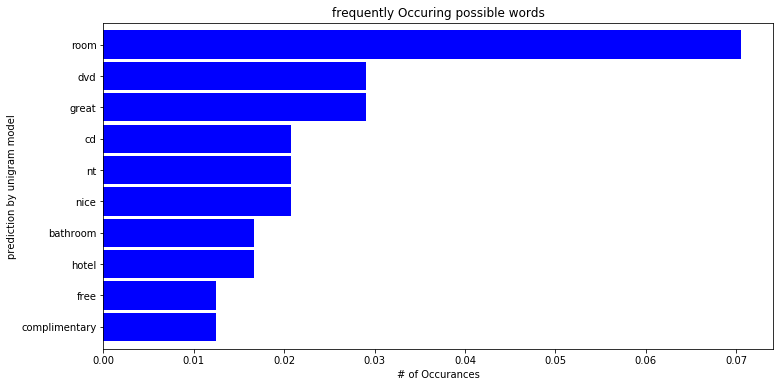

In [72]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [73]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



97


Text(0.5, 0, '# of Occurances')

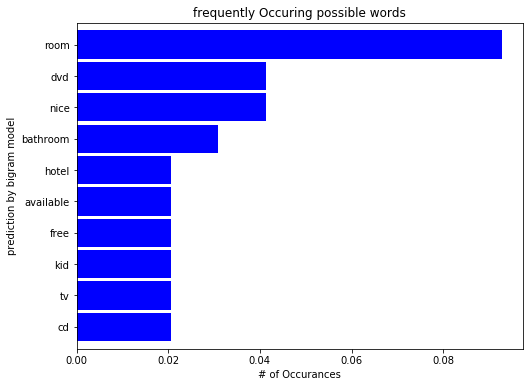

In [74]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [75]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



3


Text(0.5, 0, '# of Occurances')

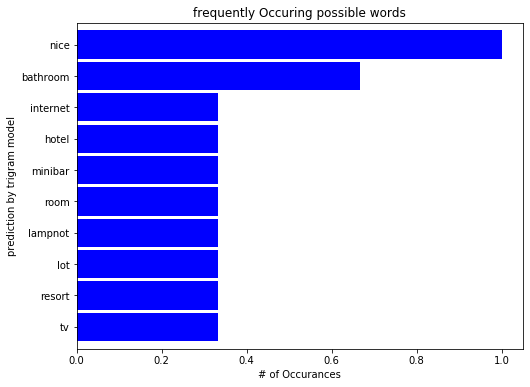

In [76]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 9


In [77]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words located corners building room huge


In [78]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


1969


Text(0.5, 0, '# of Occurances')

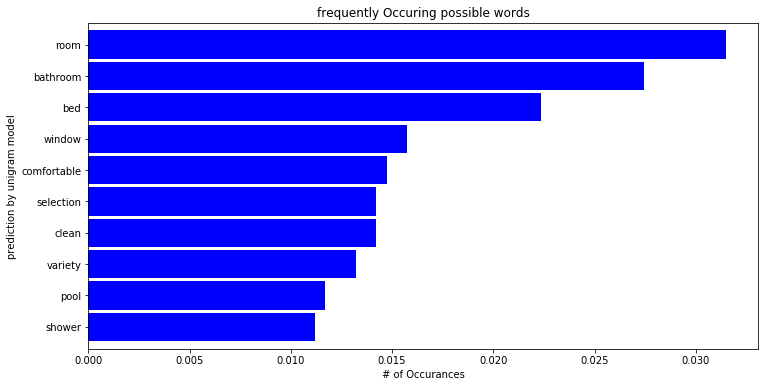

In [79]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [80]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



207


Text(0.5, 0, '# of Occurances')

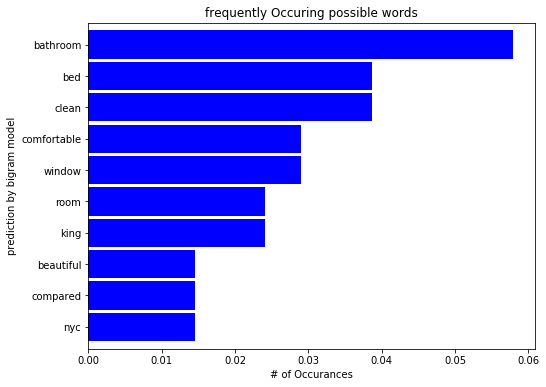

In [81]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [82]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

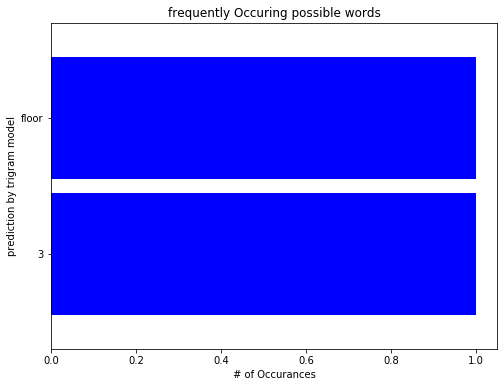

In [83]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')

# PREDICTION OF WORDS 
-- SEQUENCE NUMBER 10


In [84]:
sqofwords=input('Enter Sequence of Words ')
prdctwords = basic_clean(''.join(sqofwords))

Enter Sequence of Words ok little run average cleanliness chose


In [85]:
prdctwords_dict = {}
for (x,), value1 in uniwords.iteritems():
    if x==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b), value in biwords.iteritems():
    if a==prdctwords[-1]:
        variable=b
        prdctwords_dict[variable] = value/probistword


795


Text(0.5, 0, '# of Occurances')

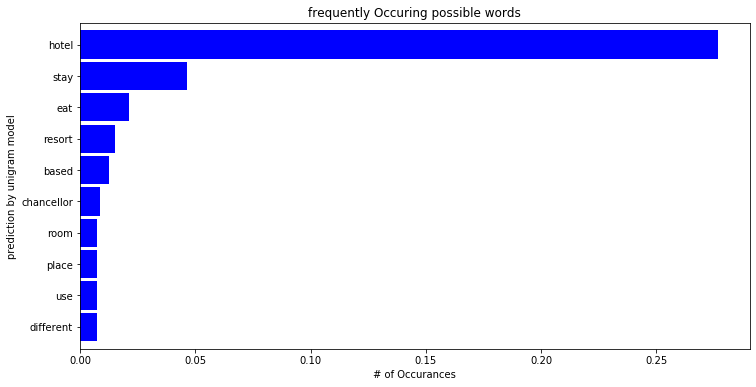

In [86]:
prdctwords_series=pd.Series(prdctwords_dict)[:10]
prdctwords_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by unigram model')
plt.xlabel('# of Occurances')

In [87]:
prdctwords2_dict = {}
print('\n')
for (x,y), value1 in biwords.iteritems():
    if x==prdctwords[-2] and y==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)

for (a,b,c), value in triwords.iteritems():
    if a==prdctwords[-2] and b==prdctwords[-1]:
        variable=c
        prdctwords2_dict[variable] = value/probistword



1


Text(0.5, 0, '# of Occurances')

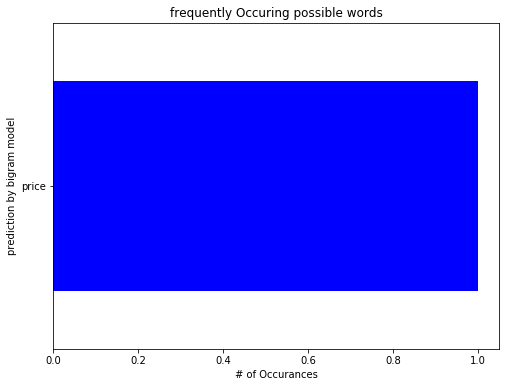

In [88]:
prdctwords2_series=pd.Series(prdctwords2_dict)[:10]
prdctwords2_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by bigram model')
plt.xlabel('# of Occurances')

In [89]:
prdctwords3_dict = {}
print('\n')
for (x,y,z,k), value1 in tetrawords.iteritems():
    if x==prdctwords[-3] and y==prdctwords[-2] and z==prdctwords[-1]:
        probistword=value1
        break       
print(probistword)
for (a,b,c,d), value in tetrawords.iteritems():
    if a==prdctwords[-3] and b==prdctwords[-2] and c==prdctwords[-1]:
        variable=d
        prdctwords3_dict[variable] = value/probistword
        



1


Text(0.5, 0, '# of Occurances')

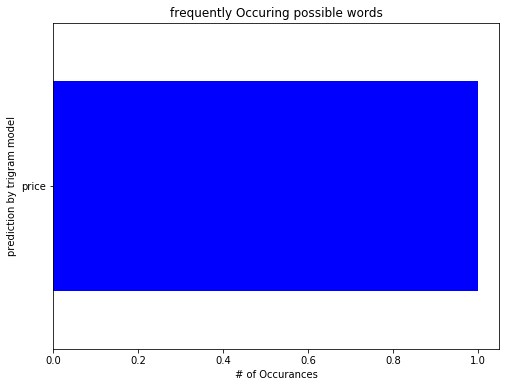

In [90]:
prdctwords3_series=pd.Series(prdctwords3_dict)[:10]
prdctwords3_series.sort_values().plot.barh(color='blue', width=.9, figsize=(8, 6))
plt.title('frequently Occuring possible words')
plt.ylabel('prediction by trigram model')
plt.xlabel('# of Occurances')